<center><b>Plotting F-measure for different beta coefficient with an optimal way to maximize the metric.</center>


F-measure is calculated according to the following formula:

$$F=(1+\beta^2)\frac{precision*recall}{\beta^2*precision+recall}$$

where:

$$precision=\frac{TP}{TP+FP},$$

$$recall=\frac{TP}{TP+FN}$$

Using beta close to 0 leads to weight increase of precision metric. Otherwise using $\beta$ more than 1 gives higher
weight to recall. This effect can be observed on charts below.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
def f_measure(prec, rec, beta):
    return (1+beta**2)*prec*rec/(beta**2*prec+rec)

In [105]:
def f_calc(step, beta):
    p = np.arange(0, 1.01, step)
    r = np.arange(0, 1.01, step)
    P, R = np.meshgrid(p, r)
    F = f_measure(P,R, beta)
    F = np.nan_to_num(F)
    
    return P, R, F

In [205]:
def equiline(step, beta):
    """
    The function calculates an optimal way to maximize 
    F-measure with a given beta coefficient
    """
    pr = [0]
    rec = [0]
    f = [0]
    while 1:
        prgain = f_measure(pr[-1]+step, rec[-1], beta)
        recgain = f_measure(pr[-1], rec[-1]+step, beta)
        if pr[-1] < 1 and (prgain > recgain or rec[-1] >= 1):
            f.append(prgain)
            pr.append(round(pr[-1]+step, 3))
            rec.append(round(rec[-1], 3))
        elif rec[-1] < 1:
            f.append(recgain)
            rec.append(round(rec[-1]+step, 3))
            pr.append(round(pr[-1], 3))
        else:
            break
    return pr, rec, f

In [206]:
def plotF(beta):
    step=0.001
    P, R, F = f_calc(step, beta)
    xline, yline, zline = equiline(step, beta)
    fig= plt.figure(figsize=(40,8))
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(P,R,F, cmap=cm.coolwarm,edgecolor='none', alpha=0.9, zorder=-1)
    ax1.set_xlim(1,0);
    ax1.set_xlabel('Precision', size=16);
    ax1.set_ylabel('Recall', size=16);
    ax1.set_zlabel('Fscore', size=16);
    plt.title(f'Beta: {beta}', size=18);
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax1.plot3D(xline, yline, zline, 'black', linewidth=3, zorder=1)    


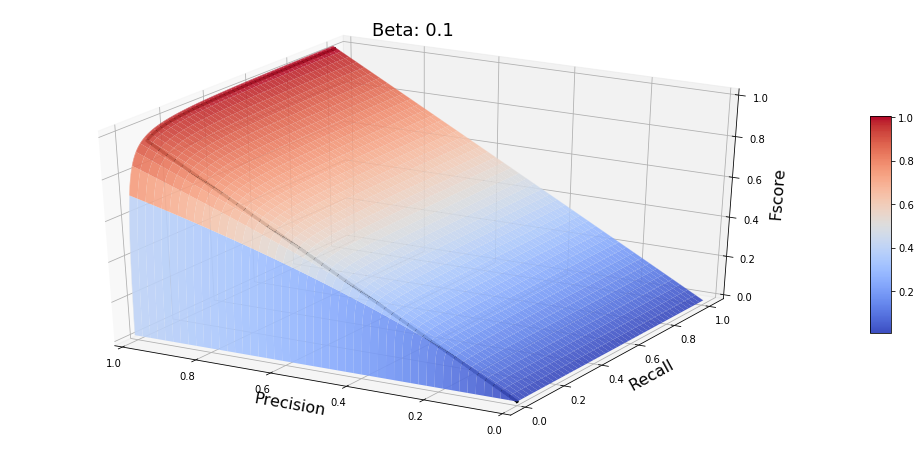

In [211]:
plotF(0.1)

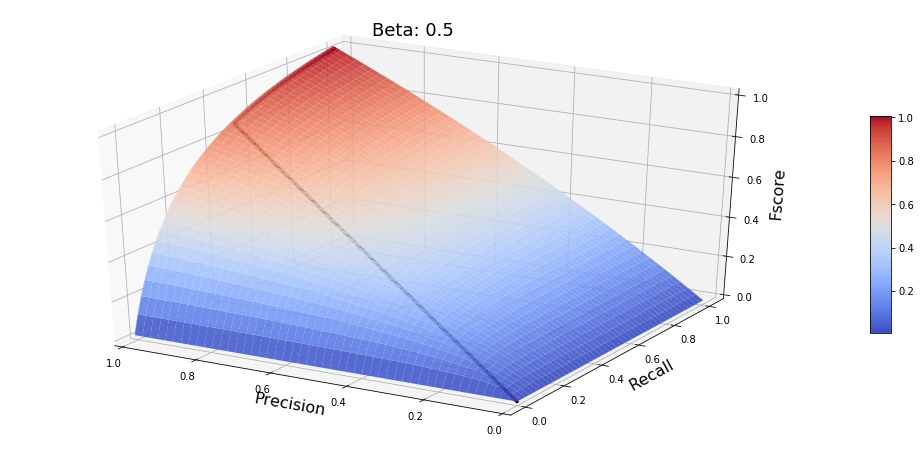

In [207]:
plotF(0.5)

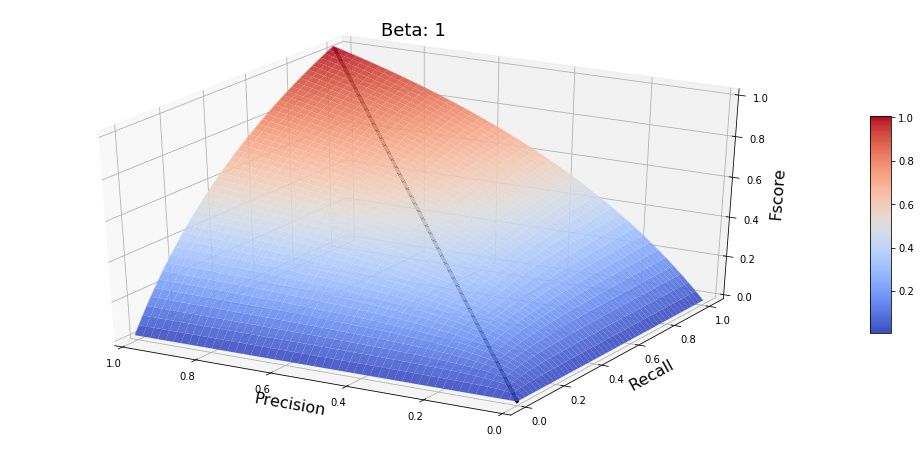

In [213]:
plotF(1)

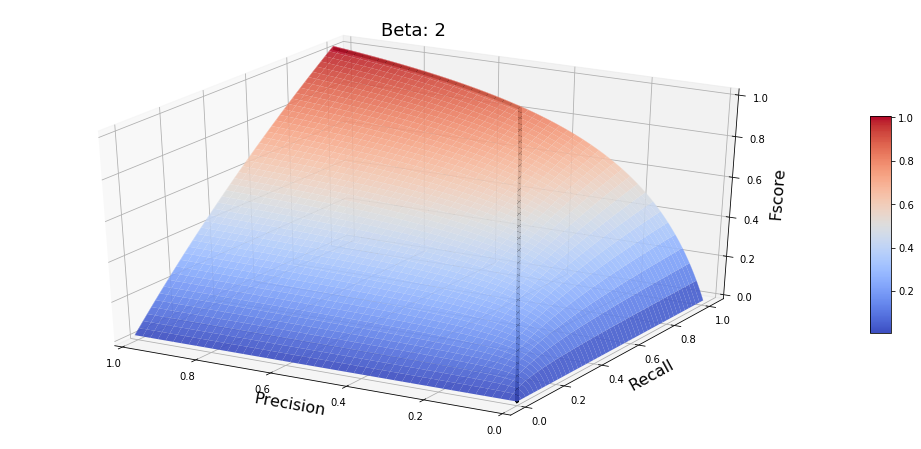

In [209]:
plotF(2)

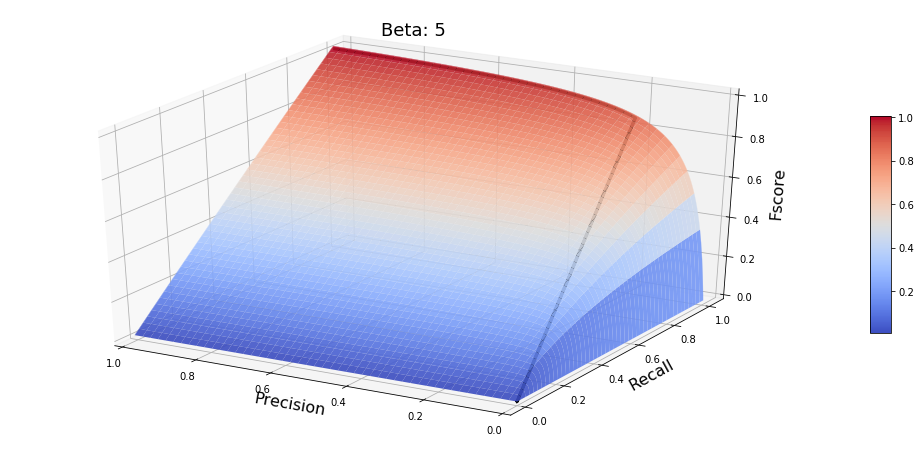

In [210]:
plotF(5)